In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook



In [92]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/Tobacco.csv"
TobaccoData = pd.read_csv(url)

In [93]:
TobaccoData.head()

,Unnamed: 0,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,1,bluecol,flanders,1,0,2,14.19054,0,0.000000,2
1,2,inactself,flanders,0,0,3,13.90857,0,0.002285,3
2,3,whitecol,flanders,0,0,1,13.97461,0,0.012875,2
3,4,bluecol,flanders,1,0,2,13.76281,0,0.005907,2
4,5,inactself,flanders,2,0,1,13.80800,0,0.021981,2


In [94]:
del TobaccoData['Unnamed: 0']
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,bluecol,flanders,1,0,2,14.19054,0,0.000000,2
1,inactself,flanders,0,0,3,13.90857,0,0.002285,3
2,whitecol,flanders,0,0,1,13.97461,0,0.012875,2
3,bluecol,flanders,1,0,2,13.76281,0,0.005907,2
4,inactself,flanders,2,0,1,13.80800,0,0.021981,2


Here is the data dictionary of this dataset:
https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Tobacco.html

In [95]:
region_dummy  = pd.get_dummies(TobaccoData['region'], prefix = 'region')
del region_dummy['region_flanders']

occupation_dummy = pd.get_dummies(TobaccoData['occupation'], prefix = 'occupation')
del occupation_dummy['occupation_inactself']

age_dummy = pd.get_dummies(TobaccoData['age'], prefix = 'age')
del age_dummy['age_0']

TobaccoData = pd.concat([TobaccoData,region_dummy ,occupation_dummy, age_dummy], axis=1)
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age,region_brussels,region_walloon,occupation_bluecol,occupation_whitecol,age_1,age_2,age_3,age_4
0,bluecol,flanders,1,0,2,14.19054,0,0.000000,2,0,0,1,0,0,1,0,0
1,inactself,flanders,0,0,3,13.90857,0,0.002285,3,0,0,0,0,0,0,1,0
2,whitecol,flanders,0,0,1,13.97461,0,0.012875,2,0,0,0,1,0,1,0,0
3,bluecol,flanders,1,0,2,13.76281,0,0.005907,2,0,0,1,0,0,1,0,0
4,inactself,flanders,2,0,1,13.80800,0,0.021981,2,0,0,0,0,0,1,0,0


#### We would like to use a Decision Tree Regression model to detect the most important variables affect expenditure on tobacco. Please follow necessary steps to develop your Regression Tree, Tune it via Cross-Validation and lastly state the most important variable you found with the corresponding MSE of your best model. Your output is stobacco

In [96]:
#Create your X and Y
X = TobaccoData[TobaccoData.columns.values]
del X['stobacco']
del X['region']
del X['occupation']
y = TobaccoData.stobacco
#Create test and train
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [97]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor()
treereg.fit(X_train,y_train)
preds = treereg.predict(X_test)
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds)) #use square root because it is mean square error

0.034155512778283714

<IPython.core.display.Javascript object>


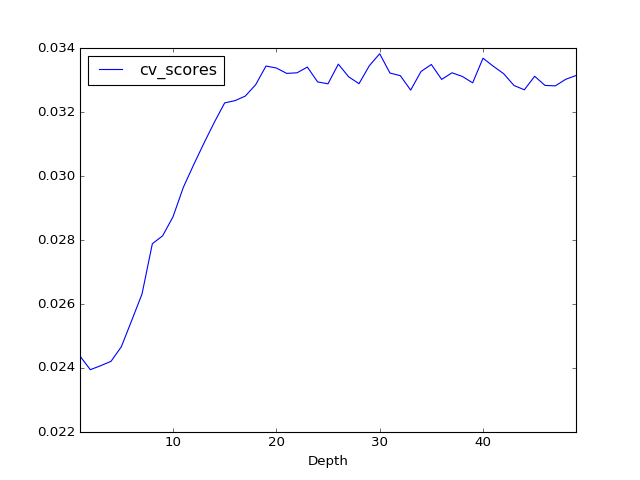

In [98]:
from sklearn.cross_validation import cross_val_score
Depth = range(1,50)  #how many leaves
score = []
for i in Depth:
      treereg = DecisionTreeRegressor(max_depth=i)
      scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
      score.append(np.mean(np.sqrt(-scores))) # use square root because it is mean square error

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Depth': Depth})
Depth_Choice_df.plot(x ='Depth',y = 'cv_scores' )





In [99]:
treereg = DecisionTreeRegressor(max_depth=2)
treereg.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':treereg.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)


,feature,importance
3,lnx,0.526694
13,age_4,0.473306
0,nkids,0.000000
1,nkids2,0.000000
2,nadults,0.000000
4,salcohol,0.000000
5,age,0.000000
6,region_brussels,0.000000
7,region_walloon,0.000000
8,occupation_bluecol,0.000000


Explain your findings:

In [100]:
#Families with higher expenditure and older age adults spend a higher amount on tobacco.

#### Now, let's treat stobacco as a dummy variable to distinguish between those who smoke and who do not. We then need to use decision tree classifier to identify the most important features that may affect probability of smoking.

In [101]:
TobaccoData['smoke'] = '1'
mask_cat0 = (TobaccoData['stobacco'] == 0)   

TobaccoData.loc[mask_cat0,'smoke'] = '0'
del TobaccoData['stobacco']
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,salcohol,age,region_brussels,region_walloon,occupation_bluecol,occupation_whitecol,age_1,age_2,age_3,age_4,smoke
0,bluecol,flanders,1,0,2,14.19054,0.000000,2,0,0,1,0,0,1,0,0,0
1,inactself,flanders,0,0,3,13.90857,0.002285,3,0,0,0,0,0,0,1,0,0
2,whitecol,flanders,0,0,1,13.97461,0.012875,2,0,0,0,1,0,1,0,0,0
3,bluecol,flanders,1,0,2,13.76281,0.005907,2,0,0,1,0,0,1,0,0,0
4,inactself,flanders,2,0,1,13.80800,0.021981,2,0,0,0,0,0,1,0,0,0


In [102]:
X = TobaccoData[TobaccoData.columns.values]
del X['smoke']
del X['region']
del X['occupation']

y = TobaccoData.smoke

In [103]:
from sklearn.tree import DecisionTreeClassifier
TreeClass = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = 5)
TreeClass.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [104]:
scores = cross_val_score(TreeClass, X, y, cv=10)  # can't use roc because there are 4 outputs in medv_category
print(scores.mean())

0.610452068281


<IPython.core.display.Javascript object>


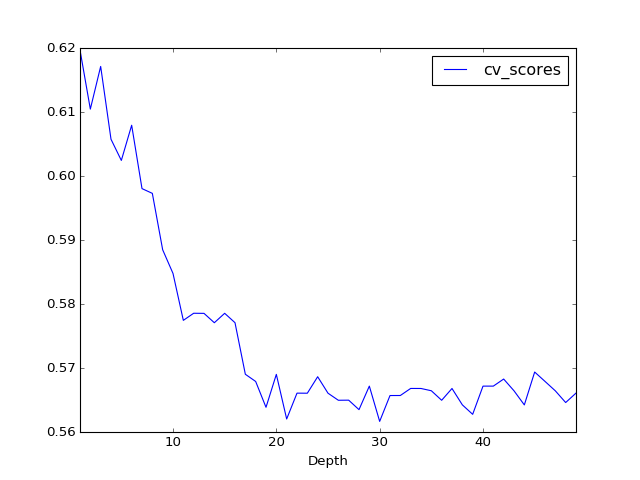

In [105]:
Depth = range(1,50)
score = []
for i in Depth:
      TreeClass = DecisionTreeClassifier(
                max_depth = i,
                min_samples_leaf = 5)
      scores = cross_val_score(TreeClass, X, y, cv=10)
      score.append(np.mean(scores))

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Depth': Depth})
Depth_Choice_df.plot(x ='Depth',y = 'cv_scores' )



In [107]:
TreeClass = DecisionTreeClassifier(
                max_depth = 1,
                min_samples_leaf = 5)
TreeClass.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':TreeClass.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

,feature,importance
13,age_4,1
0,nkids,0
1,nkids2,0
2,nadults,0
3,lnx,0
4,salcohol,0
5,age,0
6,region_brussels,0
7,region_walloon,0
8,occupation_bluecol,0


In [ ]:
Age is the chief indicator